<a href="https://colab.research.google.com/github/EsraMutlugun/Santa_Clara_County_Data_Analysis/blob/main/AmazonBestSellingBooksProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Curious the question below.

Which author's books receive the highest average rating (top authors).

Which book has the most reviews (top books).

Which genres become bestsellers more often.

Are genres different by rating

Are genres different by rating in the years.

How prices change during years by genre.

In [48]:
# import libraries and  CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io 
from google.colab import files
uploaded = files.upload()

Saving bestsellers with categories.csv to bestsellers with categories (1).csv


In [49]:
# Read CSV file
df1 = pd.read_csv(io.BytesIO(uploaded['bestsellers with categories.csv']))

In [50]:
#Take a look data
df1.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [51]:
# Take a look last columns 
df1.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [52]:
# Look at the column names
df1.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [53]:
# Display total column and row numbers
print(len(df1))
print(len(df1.columns))

550
7


In [54]:
# Check null values
df1.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [55]:
#Check duplicated values
df1[df1['Name'].duplicated() == True]

,Name,Author,User Rating,Reviews,Price,Year,Genre
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
36,Between the World and Me,Ta-Nehisi Coates,4.7,10070,13,2016,Non Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
...,...,...,...,...,...,...,...
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


There are duplicate values but they represent rating about each year. 

In [56]:
# Check is there any duplicate values in same year and same book
df1[df1.duplicated(subset=['Name','Year'], keep=False)]

,Name,Author,User Rating,Reviews,Price,Year,Genre
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction
404,The Help,Kathryn Stockett,4.8,13871,8,2011,Fiction
405,The Help,Kathryn Stockett,4.8,13871,7,2011,Fiction
518,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,13,2014,Non Fiction
519,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2014,Non Fiction


There are 3 different book name repeated in same year.

In [57]:
# Display duplicated  book names by year to decide cleaning
df1[df1["Name"] == "The Fault in Our Stars"]

,Name,Author,User Rating,Reviews,Price,Year,Genre
365,The Fault in Our Stars,John Green,4.7,50482,13,2012,Fiction
366,The Fault in Our Stars,John Green,4.7,50482,13,2013,Fiction
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction


In [58]:
# Display duplicated  book names by year to decide cleaning
df1[df1["Name"] == "The Help"]

,Name,Author,User Rating,Reviews,Price,Year,Genre
402,The Help,Kathryn Stockett,4.8,13871,6,2009,Fiction
403,The Help,Kathryn Stockett,4.8,13871,6,2010,Fiction
404,The Help,Kathryn Stockett,4.8,13871,8,2011,Fiction
405,The Help,Kathryn Stockett,4.8,13871,7,2011,Fiction


In [59]:
# Display duplicated  book names by year to decide cleaning
df1[df1["Name"] == "Unbroken: A World War II Story of Survival, Resilience, and Redemption"]

,Name,Author,User Rating,Reviews,Price,Year,Genre
515,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2010,Non Fiction
516,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2011,Non Fiction
517,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2012,Non Fiction
518,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,13,2014,Non Fiction
519,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2014,Non Fiction


In [60]:
# Clean duplicated books in same year same name
data =df1.drop([367,405,518])
data.shape

(547, 7)

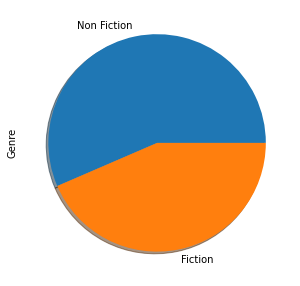

In [61]:
#See Genres distribution

data['Genre'].value_counts().plot(kind="pie",figsize=(5,5),shadow=True)

The most bestseller books are non fictions.

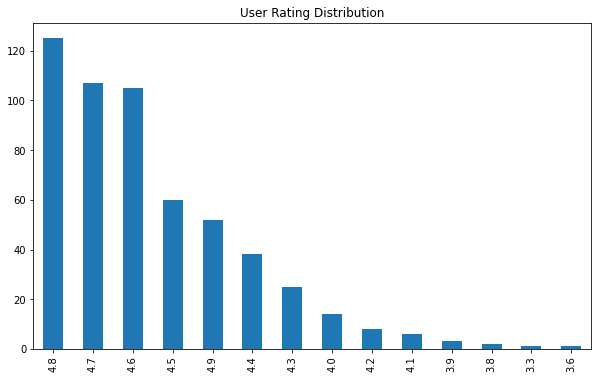

In [62]:
# Display User ratings
data["User Rating"].value_counts().plot(kind= "bar", figsize=(10,6), title="User Rating Distribution")

People give higher ratings than lower ones.

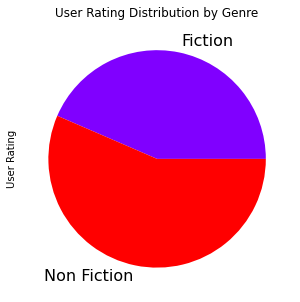

In [63]:
# Display the user ratings count by genre
data.groupby(["Genre"])["User Rating"].count().plot(kind= "pie", figsize=(5,5),title="User Rating Distribution by Genre",fontsize=16,colormap= "rainbow")
plt.show()

Non fictions rating higher than fictions.

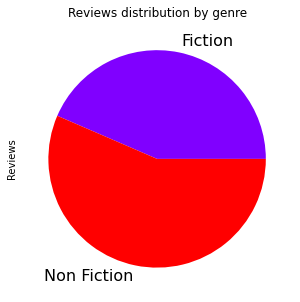

In [64]:
# Display the user Reviews count by genre
data.groupby(["Genre"])["Reviews"].count().plot(kind= "pie", figsize=(5,5),title="Reviews distribution by genre",fontsize=16,colormap= "rainbow")
plt.show()


Non fiction books have higher reviwes than fictions

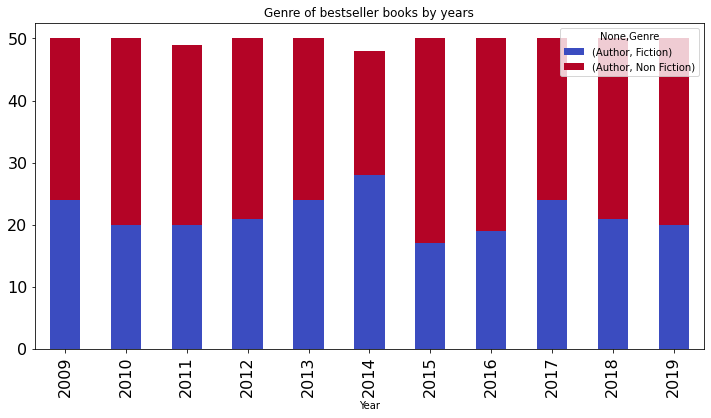

In [65]:
# Display the genre of bestseller books by years

data.groupby(["Year", "Genre"])['Author'].count().to_frame().unstack().plot(kind="bar",stacked=True, figsize=(12,6),title="Genre of bestseller books by years"
,fontsize=16, colormap="coolwarm")

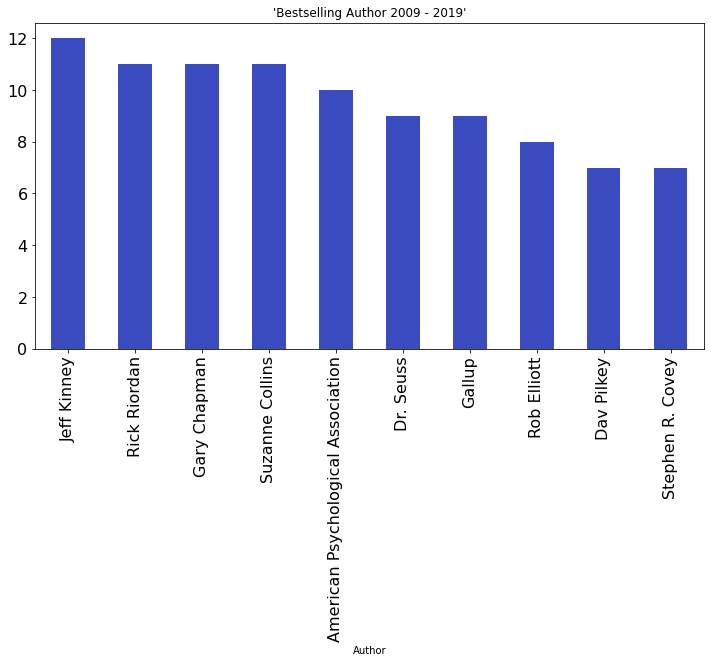

In [66]:
# Display the top Authors
data.groupby("Author")["Year"].count().sort_values(ascending=False).head(10).plot(kind="bar",figsize=(12,6),title="'Bestselling Author 2009 - 2019'"
,fontsize=16, colormap="coolwarm")

In [67]:
# Filtering the most reviews and have User Ratings  by years
Top_2019 = data[(data["Year"]== 2019)& (data["User Rating"] > 4.8)&(data["Reviews"] > 10000)]
Top_2018 = data[(data["Year"]== 2018)& (data["User Rating"] > 4.8)&(data["Reviews"] > 10000)]
Top_2017 = data[(data["Year"]== 2017)& (data["User Rating"] > 4.8)&(data["Reviews"] > 10000)]
Top_2016 = data[(data["Year"]== 2016)& (data["User Rating"] > 4.8)&(data["Reviews"] > 10000)]
Top_2015 = data[(data["Year"]== 2015)& (data["User Rating"] > 4.8)&(data["Reviews"] > 10000)]
Top_2014 = data[(data["Year"]== 2014)& (data["User Rating"] > 4.8)&(data["Reviews"] > 10000)]




In [68]:
# The top data for 2015
Top_2015

,Name,Author,User Rating,Reviews,Price,Year,Genre
191,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2015,Non Fiction
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction


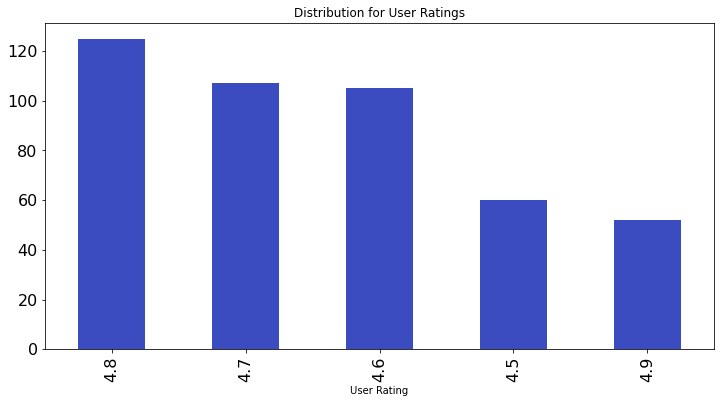

In [69]:
# Distribution for User Ratings
a=data.groupby("User Rating")["Genre"].count().sort_values(ascending=False).head().plot(kind = "bar", figsize=(12,6),title="Distribution for User Ratings"
,fontsize=16, colormap="coolwarm")
a

Text(0.5, 0, 'Year')

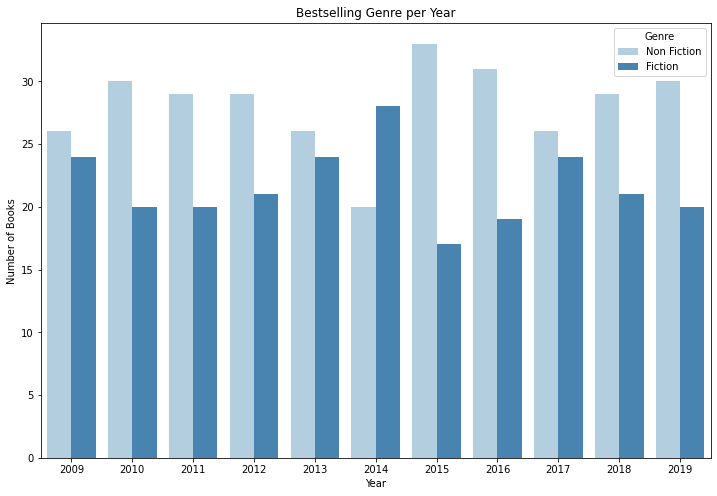

In [70]:
# Bestselling books per year by genre
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=data, x='Year', hue='Genre', palette="Blues")

ax.set_title('Bestselling Genre per Year')
ax.set_ylabel('Number of Books')
ax.set_xlabel('Year')

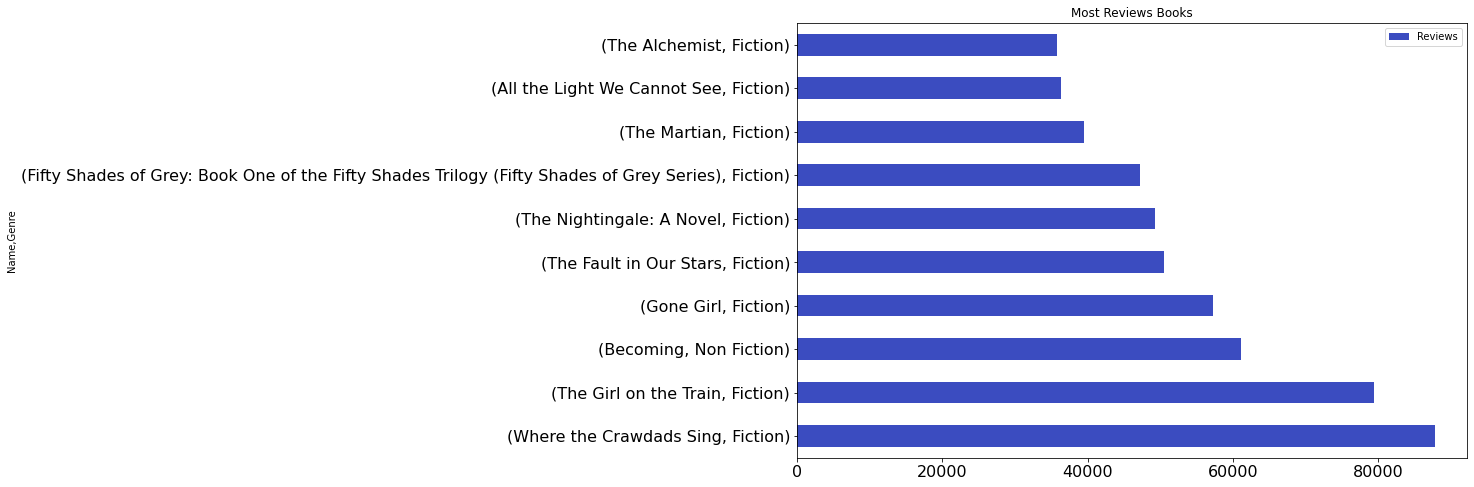

In [71]:
# Bestselling books name with reviews per year by genre

df1.groupby(['Name', 'Genre'])[['Reviews']].mean().sort_values('Reviews', ascending=False).head(10).plot(kind="barh",figsize=(12,8),title="Most Reviews Books",fontsize=16, colormap="coolwarm")
                                                                                                         

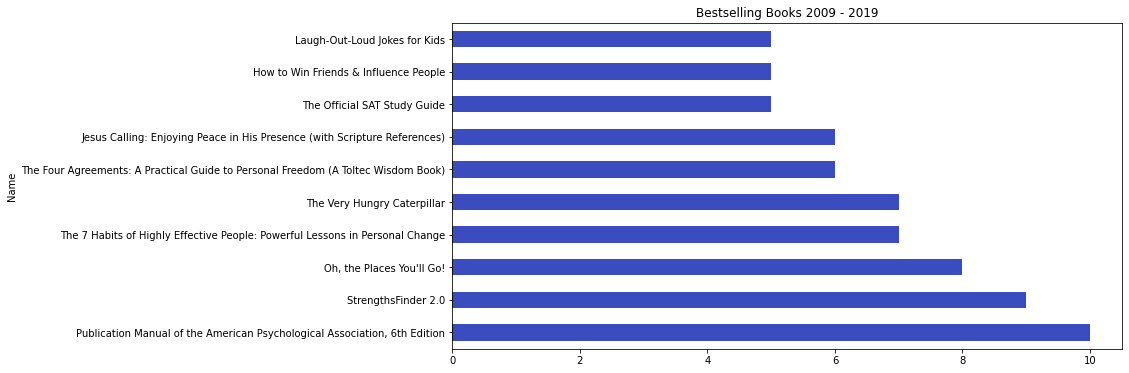

In [72]:
# Bestselling Books during 2009-2019

data.groupby("Name")["Year"].count().sort_values(ascending=False).head(10).plot(kind="barh",figsize=(12,6),title="Bestselling Books 2009 - 2019", colormap="coolwarm")


Text(0, 0.5, 'Book Title')

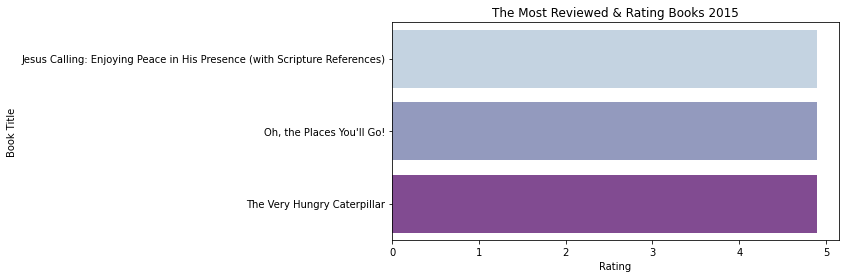

In [73]:
# The most reviewed & Rating books in 2015

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=Top_2015, x='User Rating', y="Name", palette='BuPu') 
ax.set_title('The Most Reviewed & Rating Books 2015')
ax.set_xlabel('Rating')
ax.set_ylabel('Book Title')

Text(0, 0.5, 'Book Title')

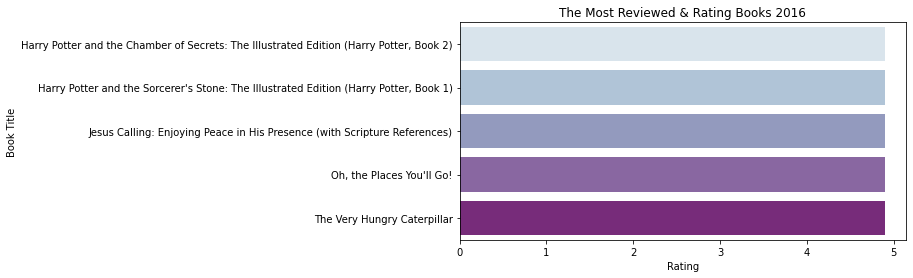

In [74]:
# The most reviewed & Rating books in 2016

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=Top_2016, x='User Rating', y="Name", palette='BuPu') 
ax.set_title('The Most Reviewed & Rating Books 2016')
ax.set_xlabel('Rating')
ax.set_ylabel('Book Title')

Text(0, 0.5, 'Book Title')

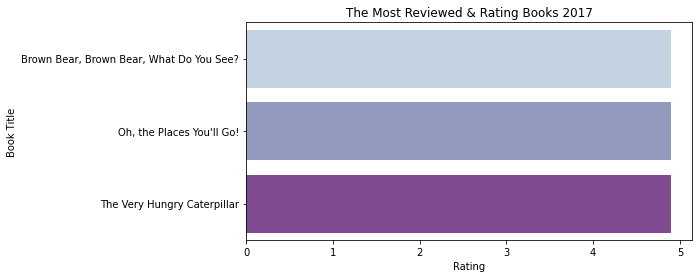

In [75]:
# The most reviewed & Rating books in 2017

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=Top_2017, x='User Rating', y="Name", palette='BuPu') 
ax.set_title('The Most Reviewed & Rating Books 2017')
ax.set_xlabel('Rating')
ax.set_ylabel('Book Title')

Text(0, 0.5, 'Book Title')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


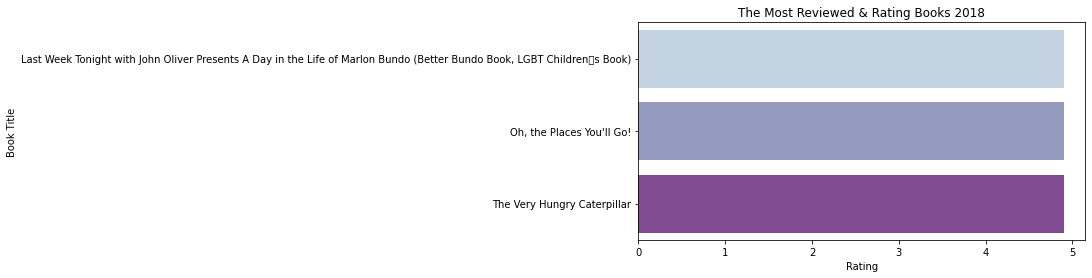

In [76]:
# The most reviewed & Rating books in 2018

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=Top_2018, x='User Rating', y="Name", palette='BuPu') 
ax.set_title('The Most Reviewed & Rating Books 2018')
ax.set_xlabel('Rating')
ax.set_ylabel('Book Title')

Text(0, 0.5, 'Book Title')

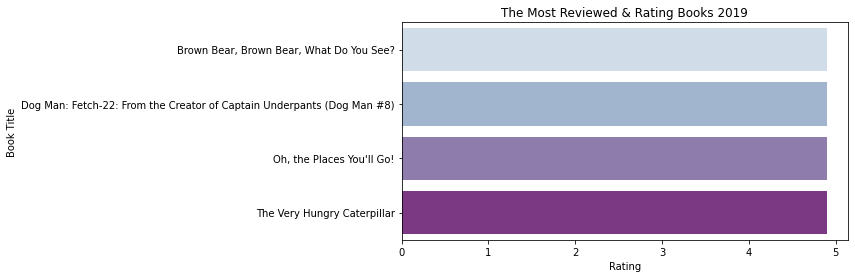

In [77]:
# The most reviewed & Rating books in 2019

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=Top_2019, x='User Rating', y="Name", palette='BuPu') 
ax.set_title('The Most Reviewed & Rating Books 2019')
ax.set_xlabel('Rating')
ax.set_ylabel('Book Title')

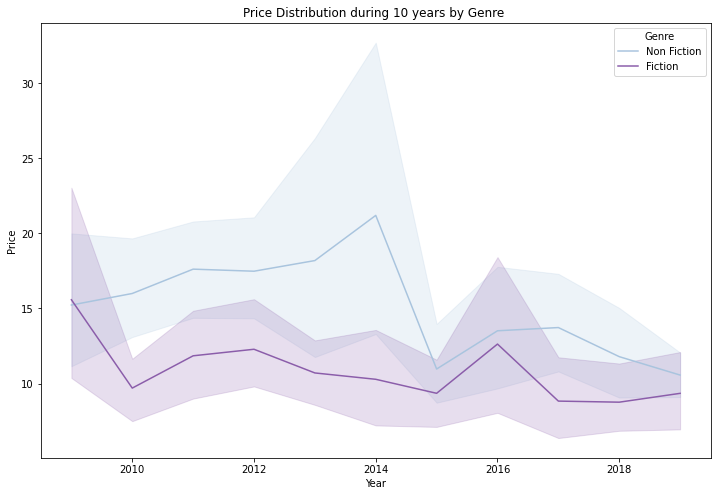

In [78]:
# Price Distribution during 10 years by Genre 
plt.figure(figsize=(12,8))
plt.title("Price Distribution during 10 years by Genre ")
sns.lineplot(data=data, x="Year", y="Price", hue= "Genre",palette="BuPu")

Text(0.5, 1.0, 'Price Distribution per Year')

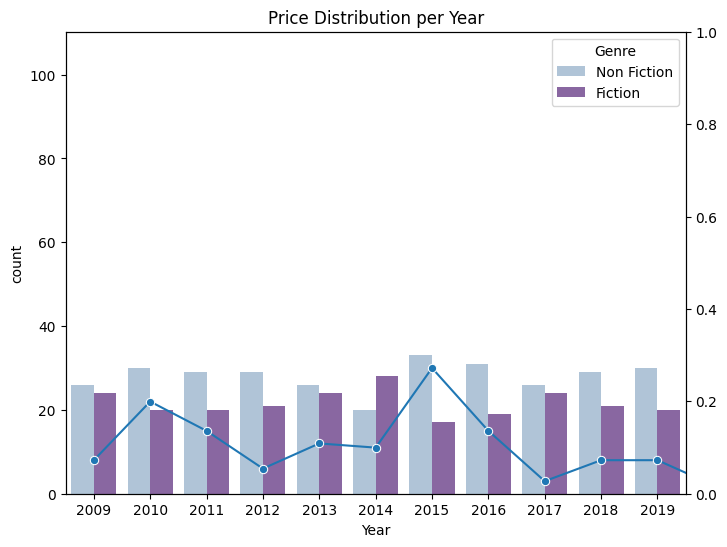

In [79]:
#Price Distribution during 10 years by Genre 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(8,6))
sns.lineplot(data = data['Price'], marker='o', sort = False, ax=ax1)
sns.countplot(data=data, x='Year', hue='Genre', palette="BuPu")
ax2 = ax1.twinx()
ax2.set_title('Price Distribution per Year')

